In [ ]:
import json
import os
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')
with open('/content/drive/My Drive/539Project/reviewSmall.json') as f:
  print(f)
  df = pd.read_json(f)
  df.info()
  df = df.drop(['review_id', 'user_id', 'business_id', 'funny', 'cool'], axis = 1)
  # df2.info()
print(df)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<_io.TextIOWrapper name='/content/drive/My Drive/539Project/reviewSmall.json' mode='r' encoding='UTF-8'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   review_id    25000 non-null  object        
 1   user_id      25000 non-null  object        
 2   business_id  25000 non-null  object        
 3   stars        25000 non-null  int64         
 4   useful       25000 non-null  int64         
 5   funny        25000 non-null  int64         
 6   cool         25000 non-null  int64         
 7   text         25000 non-null  object        
 8   date         25000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 1.7+ MB
       stars  useful                              

In [ ]:
print(df)

      stars                                               text  \
0         3  If you decide to eat here, just be aware it is...   
1         5  I've taken a lot of spin classes over the year...   
2         3  Family diner. Had the buffet. Eclectic assortm...   
3         5  Wow!  Yummy, different,  delicious.   Our favo...   
4         4  Cute interior and owner (?) gave us tour of up...   
...     ...                                                ...   
9995      5  Excellent food and service. The place is funct...   
9996      5  Just about to get tucked into a meatloaf that ...   
9997      5  Outstanding customer service! And my car is dr...   
9998      5  I and my husband went here for Dinner one day ...   
9999      2  I saw Big Data when they came to town at the K...   

                    date  
0    2018-07-07 22:09:11  
1    2012-01-03 15:28:18  
2    2014-02-05 20:30:30  
3    2015-01-04 00:01:03  
4    2017-01-14 20:54:15  
...                  ...  
9995 2018-06-26 17

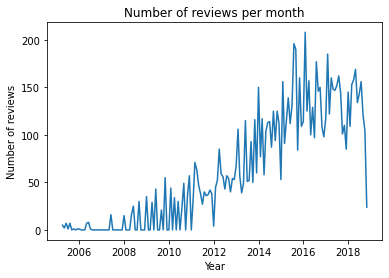

In [ ]:
import matplotlib.pyplot as plt
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
plt.plot(df['text'].resample('M').count())
plt.xlabel('Year')
plt.ylabel('Number of reviews')
plt.title('Number of reviews per month')
plt.show()

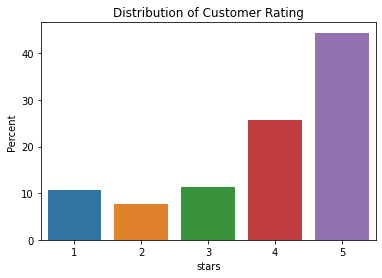

In [ ]:
import seaborn as sns
ax = sns.barplot(data=df, x='stars', y='stars', estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")
plt.title('Distribution of Customer Rating')
plt.show()

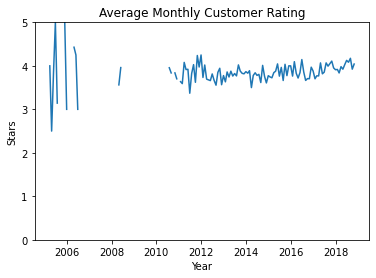

In [ ]:
plt.plot(df['stars'].resample('M').mean())
plt.xlabel('Year')
plt.ylabel('Stars')
plt.title('Average Monthly Customer Rating')
plt.ylim(0,5)
plt.show()

In [ ]:
df['text'] = [i.replace("&amp;amp;", '').replace("\'",'') for i in df['text']]

In [ ]:
from nltk.corpus import stopwords
from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS
my_stop_words = set(stopwords.words('english') + list(ENGLISH_STOP_WORDS) + ['place'])

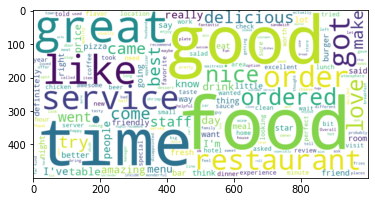

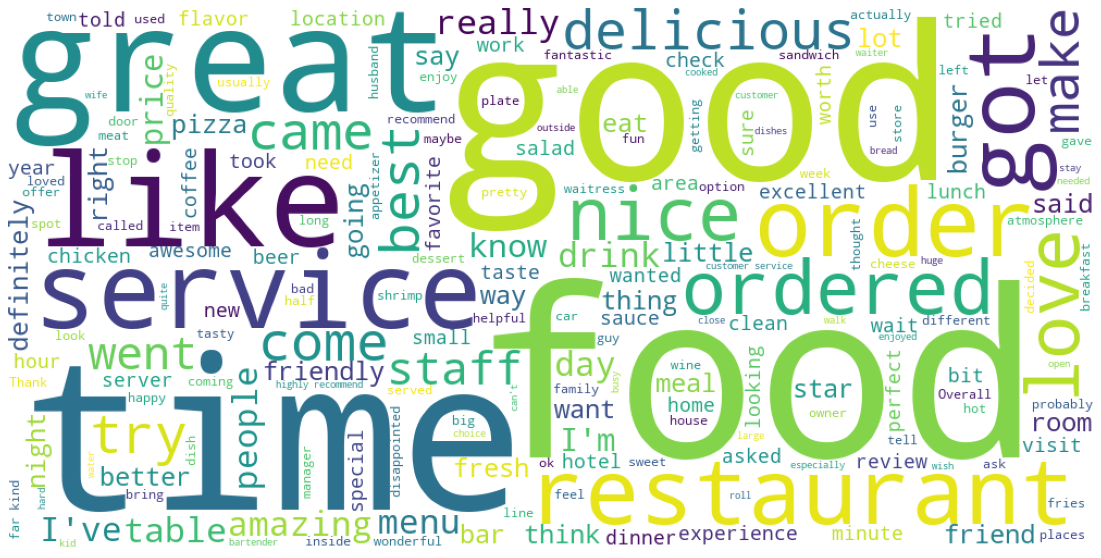

In [94]:
from wordcloud import WordCloud
# concatenate all the reviews into one single string 
full_text = ' '.join(df['text'])
cloud_no_stopword = WordCloud(background_color='white', stopwords=my_stop_words, width=1000, height=500).generate(full_text)
plt.imshow(cloud_no_stopword, interpolation='bilinear')
plt.figure( figsize=(20,10) )
plt.imshow(cloud_no_stopword)
plt.axis('off')
plt.show()

In [ ]:
from nltk.tokenize import word_tokenize
from nltk import FreqDist
lower_full_text = full_text.lower()
word_tokens = word_tokenize(lower_full_text)
tokens = list()
for word in word_tokens:
    if word.isalpha() and word not in my_stop_words:
        tokens.append(word)
token_dist = FreqDist(tokens)
dist = pd.DataFrame(token_dist.most_common(50),columns=['Word', 'Frequency'])

In [ ]:
dist

,Word,Frequency
0,food,5274
1,good,5117
2,great,4813
3,service,3235
4,like,3074
5,time,3066
6,really,2364
7,got,1867
8,nice,1809
9,best,1797


In [ ]:
from nltk.stem import PorterStemmer
porter = PorterStemmer()
stemmed_tokens =[porter.stem(word) for word in tokens]
stemmed_token_dist = FreqDist(stemmed_tokens)
stemmed_dist = pd.DataFrame(stemmed_token_dist.most_common(50),columns=['Word', 'Frequency'])


In [ ]:
# print(stemmed_dist)
stemmed_dist

,Word,Frequency
0,food,5376
1,good,5240
2,great,4821
3,time,3903
4,like,3468
5,order,3460
6,servic,3351
7,tri,2491
8,love,2379
9,realli,2364


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words=my_stop_words, ngram_range=(2,2))
bigrams = vect.fit_transform(df['text'])
bigram_df = pd.DataFrame(bigrams.toarray(), columns=vect.get_feature_names())
bigram_frequency = pd.DataFrame(bigram_df.sum(axis=0)).reset_index()
bigram_frequency.columns = ['bigram', 'frequency']
bigram_frequency = bigram_frequency.sort_values(by='frequency', ascending=False).head(50)

In [ ]:
bigram_frequency

,bigram,frequency
68581,highly recommend,180
34808,customer service,151
63466,great food,147
54911,food good,145
71891,ice cream,130
116874,really good,128
96467,new orleans,127
112110,pretty good,126
137929,staff friendly,120
63873,great service,120


In [ ]:
df_good = df.loc[df['stars'].isin([4,5])]
df_bad = df.loc[df['stars'].isin([1,2,3])]

In [ ]:
from nltk.tokenize import sent_tokenize
import re
good_reviews = ' '.join(df_good.text)
# split the long string into sentences
sentences_good = sent_tokenize(good_reviews)
good_token_clean = list()
# get tokens for each sentence
for sentence in sentences_good:
    eng_word = re.findall(r'[A-Za-z\-]+', sentence)
    good_token_clean.append([i.lower() for i in eng_word if i.lower() not in my_stop_words])

In [ ]:
bad_reviews = ' '.join(df_bad.text)
# split the long string into sentences
sentences_bad = sent_tokenize(bad_reviews)
bad_token_clean = list()
# get tokens for each sentence
for sentence in sentences_bad:
    eng_word = re.findall(r'[A-Za-z\-]+', sentence)
    bad_token_clean.append([i.lower() for i in eng_word if i.lower() not in my_stop_words])

In [ ]:
from gensim.models import Word2Vec
model_ted = Word2Vec(sentences=good_token_clean, size=24, window=10, min_count=1, workers=4, sg=0)
model_ted.predict_output_word(['service'], topn=10)

[('friendly', 0.062213123),
 ('reasonable', 0.04132036),
 ('attentive', 0.0412234),
 ('customer', 0.02422675),
 ('atmosphere', 0.023709977),
 ('prices', 0.014324932),
 ('great', 0.012970045),
 ('excellent', 0.010554024),
 ('helpful', 0.010136127),
 ('service', 0.009710313)]

In [ ]:
# Load SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# Instantiate new SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
# Generate sentiment scores
sentiment_scores = df['text'].apply(sid.polarity_scores)
sentiment = sentiment_scores.apply(lambda x: x['compound'])
monthly_sentiment = sentiment.resample('M').mean()

In [ ]:
df_good_2 = df_good.drop(['stars'], axis = 1)
df_bad_2 = df_bad.drop(['stars'], axis = 1)

In [ ]:
import numpy as np
import copy
df2 = copy.deepcopy(df)
df2['stars'] = df2['stars'].replace([1, 2, 3], [0, 0, 0])
df2['stars'] = df2['stars'].replace([4,5], [1, 1])

df2 = df2.rename(columns={"stars": "label"})

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
# vectorization
vect = TfidfVectorizer(max_features=1500, stop_words=my_stop_words) # TODO: CHANGE MAX_FEATURES WITH MORE DATA
vect.fit(df2.text)
X = vect.transform(df2.text)
X_df = pd.DataFrame(X.toarray(), columns=vect.get_feature_names())
# Define the vector of targets and matrix of features
y = df2.label
X = X_df
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression().fit(X_train, y_train)

y_pred_lg = log_reg.predict(X_test)
log_reg_tree = log_reg.predict(X_train)
# find the most informative words
log_odds = log_reg.coef_[0]
coeff = pd.DataFrame(log_odds, X.columns, columns=['coef'])\
            .sort_values(by='coef', ascending=False)

In [ ]:
import sklearn.metrics as metrics
df_good_words = coeff.loc[coeff['coef'] > 0]
df_bad_words = coeff.loc[coeff['coef'] < 0]



In [ ]:
df_good_words

,coef
great,5.120961
amazing,4.773775
delicious,4.526369
awesome,4.069167
best,3.870165
...,...
sticks,0.008663
chairs,0.008083
credit,0.002643
ramen,0.001657


In [ ]:
df_bad_words

,coef
boy,-0.000737
strong,-0.001942
night,-0.001969
pizza,-0.002424
hotel,-0.003665
...,...
horrible,-3.049099
bad,-3.194291
worst,-3.636202
mediocre,-3.851866


In [ ]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred_lg).ravel()
lr_cm = metrics.confusion_matrix(y_test, y_pred_lg)
accuracy_lr = (lr_cm[0][0] + lr_cm[1][1]) / np.sum(lr_cm)
print('tn:',tn,'fp:',fp,'fn:',fn,'tp:',tp)
print(accuracy_lr)
print(lr_cm)

tn: 572 fp: 322 fn: 83 tp: 2023
0.865
[[ 572  322]
 [  83 2023]]


In [ ]:
#Naive Bayes
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
pred = nb_classifier.predict(X_test)

In [ ]:
nb_cm = metrics.confusion_matrix(y_test, pred)
accuracy_nb = (nb_cm[0][0] + nb_cm[1][1]) / np.sum(nb_cm)
print(nb_cm)
print(accuracy_nb)

[[ 426  468]
 [  40 2066]]
0.8306666666666667


In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

# need extra validation dataset here istead of using X_test directly in neighbor selection, preventing data leakage
X_train_knn, X_val, y_train_knn, y_val = train_test_split(X_train, y_train, train_size=0.7, shuffle=None)

accuracy = []
# 1 <= k <= 10
for i in range(1,51):
  knn = KNeighborsClassifier(n_neighbors=i).fit(X_train_knn, y_train_knn)
  accuracy.append(metrics.accuracy_score(y_val, knn.predict(X_val)))

# best number of neighbors
K = np.argmax(accuracy) + 1

knn = KNeighborsClassifier(n_neighbors=K).fit(X_train, y_train)
feat_knn = knn.predict(X_train)
yknn = knn.predict(X_test)

knn_cm = metrics.confusion_matrix(y_test, yknn)
print(K)
print(accuracy)
print(knn_cm)
print(accuracy[K - 1])

16
[0.7080952380952381, 0.6633333333333333, 0.7476190476190476, 0.7328571428571429, 0.768095238095238, 0.770952380952381, 0.780952380952381, 0.7804761904761904, 0.79, 0.7885714285714286, 0.7866666666666666, 0.7866666666666666, 0.7880952380952381, 0.7957142857142857, 0.79, 0.7971428571428572, 0.7852380952380953, 0.7961904761904762, 0.7866666666666666, 0.7919047619047619, 0.7847619047619048, 0.789047619047619, 0.7838095238095238, 0.7933333333333333, 0.7857142857142857, 0.7923809523809524, 0.7838095238095238, 0.7871428571428571, 0.7842857142857143, 0.79, 0.7842857142857143, 0.7904761904761904, 0.7861904761904762, 0.789047619047619, 0.7852380952380953, 0.7904761904761904, 0.7842857142857143, 0.7871428571428571, 0.7828571428571428, 0.7876190476190477, 0.7833333333333333, 0.7857142857142857, 0.7833333333333333, 0.7861904761904762, 0.7795238095238095, 0.7857142857142857, 0.7814285714285715, 0.7876190476190477, 0.7814285714285715, 0.7876190476190477]
[[ 320  574]
 [  74 2032]]
0.79714285714285

In [ ]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
feat_tree = dtc.predict(X_train)
ytree = dtc.predict(X_test)

dtc_cm = metrics.confusion_matrix(y_test, ytree)
accuracy_dtc = (dtc_cm[0][0] + dtc_cm[1][1]) / np.sum(dtc_cm)
print(dtc_cm)
print(accuracy_dtc)

[[ 548  346]
 [ 380 1726]]
0.758


In [ ]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB().fit(X_train, y_train)
feat_nb = gnb.predict(X_train)
ynb = gnb.predict(X_test)

gnb_cm = metrics.confusion_matrix(y_test,ynb)
accuracy_gnb = (gnb_cm[0][0] + gnb_cm[1][1]) / np.sum(gnb_cm)
print(gnb_cm)
print(accuracy_gnb)

[[ 652  242]
 [ 429 1677]]
0.7763333333333333


In [ ]:
from sklearn.svm import SVC
svc = SVC().fit(X_train, y_train)
feat_svc = svc.predict(X_train)
ysvc = svc.predict(X_test)

svc_cm = metrics.confusion_matrix(y_test,ysvc)
accuracy_svc = (svc_cm[0][0] + svc_cm[1][1]) / np.sum(svc_cm)
print(svc_cm)
print(accuracy_svc)

[[ 573  321]
 [  75 2031]]
0.868


In [ ]:
# Stacked
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

feat_stacked = np.array([feat_nb,feat_knn,feat_tree, log_reg_tree]).T
stacked = GaussianNB().fit(feat_stacked,y_train)

ystacked = stacked.predict(np.array([ynb,yknn,ytree,y_pred_lg]).T)
stacked_cm = metrics.confusion_matrix(y_test, ystacked)
accuracy_stacked = (stacked_cm[0][0] + stacked_cm[1][1]) / np.sum(stacked_cm)
print(stacked_cm)
print(accuracy_stacked)

[[ 548  346]
 [ 380 1726]]
0.758


In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier().fit(X_train, y_train)
feat_xgb = xgb.predict(X_train)
yxgb = xgb.predict(X_test)

xgb_cm = metrics.confusion_matrix(y_test,yxgb)
accuracy_xgb = (xgb_cm[0][0] + xgb_cm[1][1]) / np.sum(xgb_cm)
print(xgb_cm)
print(accuracy_xgb)

[[ 460  434]
 [  72 2034]]
0.8313333333333334


Attempting to classify reviews into individual ratings as opposed to simply positive or negative. Accuracy decreases significantly but offers a more specific result.

In [ ]:
import numpy as np
import copy
df3 = copy.deepcopy(df)

df3 = df3.rename(columns={"stars": "label"})
df3

,label,text
date,,
2018-07-07 22:09:11,3,"If you decide to eat here, just be aware it is..."
2012-01-03 15:28:18,5,Ive taken a lot of spin classes over the years...
2014-02-05 20:30:30,3,Family diner. Had the buffet. Eclectic assortm...
2015-01-04 00:01:03,5,"Wow! Yummy, different, delicious. Our favo..."
2017-01-14 20:54:15,4,Cute interior and owner (?) gave us tour of up...
...,...,...
2018-06-26 17:41:31,5,Excellent food and service. The place is funct...
2018-01-09 20:26:13,5,Just about to get tucked into a meatloaf that ...
2015-04-01 21:50:28,5,Outstanding customer service! And my car is dr...


In [ ]:
# vectorization
vect = TfidfVectorizer(max_features=1500, stop_words=my_stop_words) # TODO: CHANGE MAX_FEATURES WITH MORE DATA
vect.fit(df3.text)
X = vect.transform(df3.text)
X_df = pd.DataFrame(X.toarray(), columns=vect.get_feature_names())
# Define the vector of targets and matrix of features
y = df3.label
X = X_df
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
log_reg = LogisticRegression(max_iter=1000).fit(X_train, y_train)

y_pred_lg = log_reg.predict(X_test)
log_reg_tree = log_reg.predict(X_train)

In [ ]:
lr_cm = metrics.confusion_matrix(y_test, y_pred_lg)
accuracy_lr = (lr_cm[0][0] + lr_cm[1][1] + lr_cm[2][2] + lr_cm[3][3] + lr_cm[4][4]) / np.sum(lr_cm)
print(accuracy_lr)
print(lr_cm)

0.5823333333333334
[[ 206   23   16   27   52]
 [  61   35   57   40   36]
 [  22   16   69  153   82]
 [   9    2   34  306  421]
 [   6    1    8  187 1131]]


In [ ]:
#Naive Bayes
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
pred = nb_classifier.predict(X_test)

In [ ]:
nb_cm = metrics.confusion_matrix(y_test, pred)
accuracy_nb = (nb_cm[0][0] + nb_cm[1][1] + nb_cm[2][2] + nb_cm[3][3] + nb_cm[4][4]) / np.sum(nb_cm)
print(nb_cm)
print(accuracy_nb)

[[ 170    5    5   38  106]
 [  33    2   12   87   95]
 [  19    1   11  153  158]
 [   8    0    0  184  580]
 [   9    0    0   87 1237]]
0.5346666666666666


In [ ]:
# need extra validation dataset here istead of using X_test directly in neighbor selection, preventing data leakage
X_train_knn, X_val, y_train_knn, y_val = train_test_split(X_train, y_train, train_size=0.7, shuffle=None)

accuracy = []
# 1 <= k <= 10
for i in range(1,51):
  knn = KNeighborsClassifier(n_neighbors=i).fit(X_train_knn, y_train_knn)
  accuracy.append(metrics.accuracy_score(y_val, knn.predict(X_val)))

# best number of neighbors
K = np.argmax(accuracy) + 1

knn = KNeighborsClassifier(n_neighbors=K).fit(X_train, y_train)
feat_knn = knn.predict(X_train)
yknn = knn.predict(X_test)

knn_cm = metrics.confusion_matrix(y_test, yknn)
print(K)
print(accuracy)
print(knn_cm)
print(accuracy[K - 1])

50
[0.1, 0.10714285714285714, 0.26571428571428574, 0.38476190476190475, 0.4004761904761905, 0.42904761904761907, 0.45285714285714285, 0.4738095238095238, 0.4776190476190476, 0.4880952380952381, 0.49952380952380954, 0.5023809523809524, 0.5066666666666667, 0.5047619047619047, 0.508095238095238, 0.5061904761904762, 0.5138095238095238, 0.5152380952380953, 0.5147619047619048, 0.5161904761904762, 0.5152380952380953, 0.5171428571428571, 0.518095238095238, 0.5157142857142857, 0.5176190476190476, 0.5166666666666667, 0.5152380952380953, 0.5128571428571429, 0.5128571428571429, 0.5161904761904762, 0.5152380952380953, 0.5161904761904762, 0.5095238095238095, 0.508095238095238, 0.5109523809523809, 0.5109523809523809, 0.5142857142857142, 0.5147619047619048, 0.5142857142857142, 0.5128571428571429, 0.5176190476190476, 0.5171428571428571, 0.5157142857142857, 0.5166666666666667, 0.5133333333333333, 0.5166666666666667, 0.5161904761904762, 0.5166666666666667, 0.5195238095238095, 0.5238095238095238]
[[ 129  

In [ ]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
feat_tree = dtc.predict(X_train)
ytree = dtc.predict(X_test)

dtc_cm = metrics.confusion_matrix(y_test, ytree)
accuracy_dtc = (dtc_cm[0][0] + dtc_cm[1][1] + dtc_cm[2][2] + dtc_cm[3][3] + dtc_cm[4][4]) / np.sum(dtc_cm)
print(dtc_cm)
print(accuracy_dtc)

[[141  53  33  42  55]
 [ 51  42  30  54  52]
 [ 27  36  63 112 104]
 [ 29  40  78 248 377]
 [ 45  34  80 317 857]]
0.4503333333333333


In [ ]:
from sklearn.svm import SVC
svc = SVC().fit(X_train, y_train)
feat_svc = svc.predict(X_train)
ysvc = svc.predict(X_test)

svc_cm = metrics.confusion_matrix(y_test,ysvc)
accuracy_svc = (svc_cm[0][0] + svc_cm[1][1] + svc_cm[2][2] + svc_cm[3][3] + svc_cm[4][4]) / np.sum(svc_cm)
print(svc_cm)
print(accuracy_svc)

[[ 201   14   14   30   65]
 [  56   27   42   58   46]
 [  21   10   51  165   95]
 [   9    1   12  287  463]
 [   5    0    4  161 1163]]
0.5763333333333334


In [ ]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB().fit(X_train, y_train)
feat_nb = gnb.predict(X_train)
ynb = gnb.predict(X_test)

gnb_cm = metrics.confusion_matrix(y_test,ynb)
accuracy_gnb = (gnb_cm[0][0] + gnb_cm[1][1] + gnb_cm[2][2] + gnb_cm[3][3] + gnb_cm[4][4]) / np.sum(gnb_cm)
print(gnb_cm)
print(accuracy_gnb)

[[200  82  21  13   8]
 [ 76  83  50  15   5]
 [ 76 100  86  49  31]
 [ 94 134 208 186 150]
 [205 205 186 244 493]]
0.34933333333333333


In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier().fit(X_train, y_train)
feat_xgb = xgb.predict(X_train)
yxgb = xgb.predict(X_test)

xgb_cm = metrics.confusion_matrix(y_test,yxgb)
accuracy_xgb = (xgb_cm[0][0] + xgb_cm[1][1] + xgb_cm[2][2] + xgb_cm[3][3] + xgb_cm[4][4]) / np.sum(xgb_cm)
print(xgb_cm)
print(accuracy_xgb)

[[ 156   11    4   30  123]
 [  39   12   33   52   93]
 [  18    8   36  144  136]
 [   6    2   17  248  499]
 [  11    3    6  126 1187]]
0.5463333333333333


In [ ]:
import nltk
nltk.download('punkt')
import re
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True